# 2. 데이터 가져오기

* [데이콘](https://dacon.io/competitions/official/235840/data)

In [1]:
# 데이터 불러오기
import numpy as np
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/datasets/wine/train.csv', index_col='id')
test_df = pd.read_csv('/content/drive/MyDrive/datasets/wine/test.csv', index_col='id')

In [37]:
# 앞 데이터 보기1
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
id,,,,,,,,,,,,,
1,8.0,0.18,0.37,1.3,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,1,6
2,7.5,0.38,0.29,4.9,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,1,7
3,6.1,0.27,0.33,2.2,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,1,6
4,6.4,0.32,0.50,10.7,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,1,5
5,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,0,7


In [38]:
# 앞 데이터 보기2
test_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
id,,,,,,,,,,,,
1,7.3,0.31,0.25,6.65,0.032,30.0,138.0,0.99244,2.90,0.37,11.1,1
2,8.7,0.70,0.24,2.50,0.226,5.0,15.0,0.99910,3.32,0.60,9.0,0
3,6.9,0.63,0.01,2.40,0.076,14.0,39.0,0.99522,3.34,0.53,10.8,0
4,6.3,0.23,0.50,10.40,0.043,61.0,132.0,0.99542,2.86,0.46,9.1,1
5,6.9,0.54,0.04,3.00,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,0


In [4]:
# 열 정보 보기1
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3231 entries, 1 to 3231
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3231 non-null   float64
 1   volatile acidity      3231 non-null   float64
 2   citric acid           3231 non-null   float64
 3   residual sugar        3231 non-null   float64
 4   chlorides             3231 non-null   float64
 5   free sulfur dioxide   3231 non-null   float64
 6   total sulfur dioxide  3231 non-null   float64
 7   density               3231 non-null   float64
 8   pH                    3231 non-null   float64
 9   sulphates             3231 non-null   float64
 10  alcohol               3231 non-null   float64
 11  type                  3231 non-null   object 
 12  quality               3231 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 353.4+ KB


In [5]:
# 열 정보 보기2
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3231 entries, 1 to 3231
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3231 non-null   float64
 1   volatile acidity      3231 non-null   float64
 2   citric acid           3231 non-null   float64
 3   residual sugar        3231 non-null   float64
 4   chlorides             3231 non-null   float64
 5   free sulfur dioxide   3231 non-null   float64
 6   total sulfur dioxide  3231 non-null   float64
 7   density               3231 non-null   float64
 8   pH                    3231 non-null   float64
 9   sulphates             3231 non-null   float64
 10  alcohol               3231 non-null   float64
 11  type                  3231 non-null   object 
dtypes: float64(11), object(1)
memory usage: 328.1+ KB


In [6]:
# Null 건수 보기1
train_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
quality                 0
dtype: int64

In [7]:
# Null 건수 보기2
test_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [56]:
train_df['quality'].value_counts()

6    1418
5    1069
7     539
4     108
8      97
Name: quality, dtype: int64

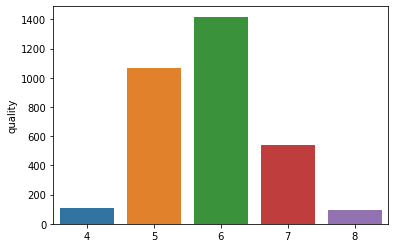

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

ounted_value = train_df['quality'].value_counts()
sns.barplot(x=counted_value.index, y=counted_value)

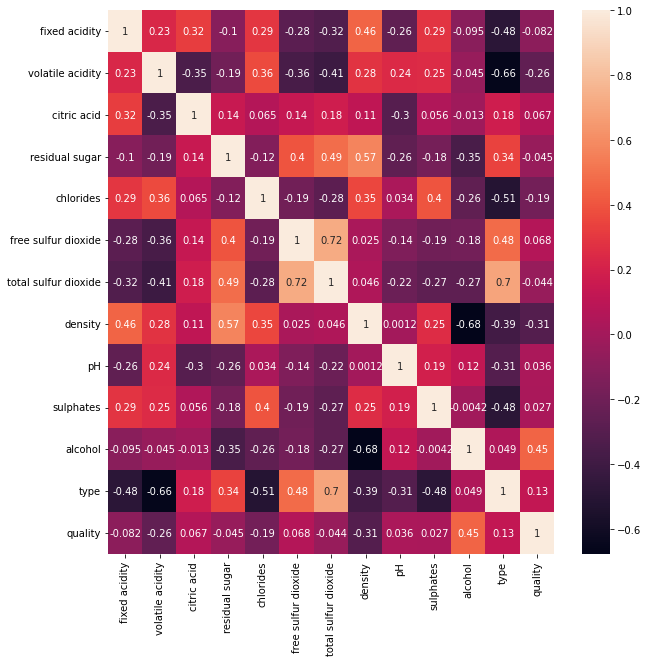

In [63]:
plt.figure(figsize=(10, 10))
sns.heatmap(train_df.corr(), annot=True)

# 3. 데이터 전처리하기

* 결측치는 없음

* 범주형 데이터 변환하기 : 학습에 필요한 모든 문자열 값은 인코딩되어 숫자형으로 변환해야 함

* 피처 스케일링하기

## 3-2. 범주형 데이터 변환하기

* 머신러닝에서는 학습에 필요한 문자열값은 인코딩되어 수치형 데이터로 변환해 주어야 합니다.

* 만약에 봄을 1, 여름을 2, 가을을 3, 겨울을 4로 변환하게 되면 어떻게 될까요?

* (   ) : 피처 값의 유형에 따라 새로운 피처를 추가하여 고유값에 해당하는 컬럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식입니다.

* 이렇게 되면 더미로 만든 가변수로 변환하여 관계성이 생기지 않게 됩니다.

In [13]:
# 범주형 데이터 : type
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# X_train데이터를 이용 피팅하고 라벨숫자로 변환한다
encoder.fit(train_df['type'])
train_df['type'] = encoder.transform(train_df['type'])
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
id,,,,,,,,,,,,,
1,8.0,0.18,0.37,1.3,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,1,6
2,7.5,0.38,0.29,4.9,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,1,7
3,6.1,0.27,0.33,2.2,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,1,6
4,6.4,0.32,0.50,10.7,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,1,5
5,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,0,7


In [14]:
test_df['type'] = encoder.transform(test_df['type'])
test_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
id,,,,,,,,,,,,
1,7.3,0.31,0.25,6.65,0.032,30.0,138.0,0.99244,2.90,0.37,11.1,1
2,8.7,0.70,0.24,2.50,0.226,5.0,15.0,0.99910,3.32,0.60,9.0,0
3,6.9,0.63,0.01,2.40,0.076,14.0,39.0,0.99522,3.34,0.53,10.8,0
4,6.3,0.23,0.50,10.40,0.043,61.0,132.0,0.99542,2.86,0.46,9.1,1
5,6.9,0.54,0.04,3.00,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,0


In [64]:
# 표준화를 통해 스케일링하기
transform_data = train_df.drop(columns=['type', 'quality'])

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_data = ss.fit_transform(transform_data)

train_df[transform_data.columns] = scaled_data
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
id,,,,,,,,,,,,,
1,0.613164,-0.973871,0.346320,-0.862826,-0.444893,-0.896417,-0.363344,-1.135570,-0.952533,0.524814,1.342873,1,6
2,0.227151,0.274102,-0.202257,-0.115217,-0.976867,0.426604,-0.058413,-1.443438,-0.828960,-0.343803,2.096877,1,7
3,-0.853685,-0.412283,0.072032,-0.675924,-0.976867,-0.263668,0.013335,-1.987120,-0.581815,-1.546504,1.677986,1,6
4,-0.622077,-0.100290,1.237759,1.089263,-0.248903,1.519535,1.609735,0.698538,-0.828960,0.457997,-0.919137,1,5
5,0.921975,0.211703,0.757754,-0.655157,0.199075,-1.068985,-1.744499,0.272763,-0.272884,1.861148,0.588870,0,7


In [66]:
# 표준편차 3 이상을 이상치로 판단하고 제거하기
train_df[transform_data.columns] = np.where(abs(scaled_data > 3), np.nan, scaled_data)
train_df.dropna(inplace=True)

In [69]:
# Data Augmentation
# data imbalance 때문에 4, 8을 잘 예측하지 못함
# 수가 적은 class의 data를 2배로 늘려주기
print('before', len(train_df['quality'].isin([4, 8])))
train_df = train_df.append(train_df[train_df['quality'].isin([4, 8])])
print('after', len(train_df['quality'].isin([4, 8])))

before 2991
after 3175


In [78]:
# 표준화를 통해 스케일링하기
transform_data2 = test_df.drop(columns=['type'])

scaled_data2 = ss.transform(transform_data2)

test_df[transform_data2.columns] = scaled_data2
test_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
id,,,,,,,,,,,,
1,0.072746,-0.162688,-0.476546,0.248203,-0.668882,-0.033577,0.390013,-0.729446,-1.941112,-1.078787,0.505092,1
2,1.153582,2.270859,-0.545118,-0.613623,4.762850,-1.471644,-1.816247,1.451832,0.653909,0.457997,-1.254250,0
3,-0.236064,1.834068,-2.122279,-0.634390,0.563057,-0.953940,-1.385757,0.181058,0.777481,-0.009720,0.253757,0
4,-0.699279,-0.661878,1.237759,1.026963,-0.360897,1.749625,0.282391,0.246561,-2.188257,-0.477437,-1.170472,1
5,-0.236064,1.272481,-1.916562,-0.509789,0.591056,-1.356598,-1.601002,1.320824,2.939999,2.529316,-0.919137,0


# 4. 데이터 분리하기

In [70]:
# 데이터 분리하기
from sklearn.model_selection import train_test_split

X_data = train_df.drop('quality', axis=1)
y_data = train_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=11)
X_train.shape, X_test.shape

((2540, 12), (635, 12))

# 5. 모델 선택 및 훈련하기

In [18]:
# 사이킷런 알고리즘 import하기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [45]:
# Decision Tree
params = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 3, 4]
}
dt = DecisionTreeClassifier(random_state=11)

gs1 = GridSearchCV(dt, param_grid=params, n_jobs=-1)

gs1.fit(X_train, y_train)

print('best parameter:', gs1.best_params_)
print('best score:', gs1.best_score_)
print(gs1.score(X_train, y_train))
print(gs1.score(X_test, y_test))

best parameter: {'max_depth': 8, 'min_samples_split': 4}
best score: 0.5406257028473753
0.6923374613003096
0.5471406491499228


In [71]:
# Random Forest
params = {  
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [200, 300, 400]
}
rf = RandomForestClassifier(random_state=11)

gs2 = GridSearchCV(rf, param_grid=params, n_jobs=-1)

gs2.fit(X_train, y_train)
 
print('best parameter:', gs2.best_params_)
print('best score:', gs2.best_score_)
print(gs2.score(X_train, y_train))
print(gs2.score(X_test, y_test))

best parameter: {'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 400}
best score: 0.655511811023622
0.9653543307086614
0.6724409448818898


In [41]:
# Logistic Regression
params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 5, 10],
    'max_iter': [500, 750, 1000]
}
lr = LogisticRegression(solver='liblinear')

gs3 = GridSearchCV(lr, param_grid=params, n_jobs=-1)

gs3.fit(X_train, y_train)

print('best parameter:', gs3.best_params_)
print('best score:', gs3.best_score_)
print(gs3.score(X_train, y_train))
print(gs3.score(X_test, y_test))

best parameter: {'C': 1, 'max_iter': 500, 'penalty': 'l1'}
best score: 0.5429505345388572
0.5452786377708978
0.5440494590417311


In [42]:
# 그레디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate

gb = GradientBoostingClassifier(random_state=11)
scores = cross_validate(gb, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

0.7897635684267559
0.5731388601502407


In [43]:
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=11)
scores = cross_validate(xgb, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

0.6981421228310027
0.5762366365285712


In [72]:
# LightGBM
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=11)
scores = cross_validate(lgb, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

0.9901574803149608
0.6417322834645669


# 6. 모델 예측값 저장하기

In [79]:
# 모델 예측값 얻기
best_rf = gs2.best_estimator_
pred = best_rf.predict(test_df)
pred

array([6, 5, 6, ..., 5, 7, 6])

In [80]:
# 파일 저장하기
submission = pd.read_csv('/content/drive/MyDrive/datasets/wine/sample_submission.csv')

submission['id2'] = test_df.index
submission['quality'] = pred

submission.to_csv('/content/drive/MyDrive/datasets/wine/my_submission.csv', index=False)